Autoencoders

In [3]:
import pandas as pd 
import numpy as np 
import math as mt
from sklearn.model_selection import train_test_split

failure_data = r'C:\Users\Niranjan\Desktop\BISAG\machine failed\cleaned_data.csv'
dataset = pd.read_csv(failure_data)
df = dataset
df.shape

(2924, 24)

In [4]:
df.head()

,Date,Time,Eqp1 Load(%),Eqp1 Pressure1(bar),Eqp1 Pressure2(bar),Eqp1 Supply Of oil Pressure(bar),Eqp1 oil filter variations Presssure(bar),Eqp1 Temp1(degree),Eqp1 Temp1 working,Eqp1 Temp2(degree),...,Eqp2 OutGoing Pressure(bar),Eqp2 OutGoing Pressure Working,Eqp2 Pressure(bar) Diff,Eqp2 Pressure Diff Working,Eqp2 Incoming Temp(degree),Eqp2 Outgoiing Temp(degree),Eqp3 cold water flow (m/hr),Eqp3 Incoming Pressure(bar),Eqp3 Outgoing Pressure(bar),Failure
0,20-09-2021,18:45:00,80,2.4,8.5,8.8,0,22,1,65,...,0.5,1,0.13,1,30,32.0,80,4.5,4.1,0
1,21-09-2021,19:45:00,80,1.8,9.0,8.5,0,16,1,63,...,0.0,1,0.15,1,28,30.0,0,4.2,4.5,0
2,21-09-2021,20:45:00,80,1.8,9.0,8.5,0,16,1,63,...,0.0,1,0.15,1,28,30.0,0,4.2,4.5,0
3,21-09-2021,21:45:00,80,1.8,9.0,8.5,0,16,1,63,...,0.0,1,0.15,1,28,30.0,0,4.2,4.5,0
4,21-09-2021,22:45:00,60,1.8,8.5,8.1,0,15,1,60,...,0.0,1,0.30,1,28,30.0,0,4.2,4.5,0


In [5]:
df2 = pd.DataFrame(df)

In [6]:
df2["Date"] = df2['Date'].astype(str) + "  " + df['Time'].astype(str)

In [7]:
df2.head()

,Date,Time,Eqp1 Load(%),Eqp1 Pressure1(bar),Eqp1 Pressure2(bar),Eqp1 Supply Of oil Pressure(bar),Eqp1 oil filter variations Presssure(bar),Eqp1 Temp1(degree),Eqp1 Temp1 working,Eqp1 Temp2(degree),...,Eqp2 OutGoing Pressure(bar),Eqp2 OutGoing Pressure Working,Eqp2 Pressure(bar) Diff,Eqp2 Pressure Diff Working,Eqp2 Incoming Temp(degree),Eqp2 Outgoiing Temp(degree),Eqp3 cold water flow (m/hr),Eqp3 Incoming Pressure(bar),Eqp3 Outgoing Pressure(bar),Failure
0,20-09-2021 18:45:00,18:45:00,80,2.4,8.5,8.8,0,22,1,65,...,0.5,1,0.13,1,30,32.0,80,4.5,4.1,0
1,21-09-2021 19:45:00,19:45:00,80,1.8,9.0,8.5,0,16,1,63,...,0.0,1,0.15,1,28,30.0,0,4.2,4.5,0
2,21-09-2021 20:45:00,20:45:00,80,1.8,9.0,8.5,0,16,1,63,...,0.0,1,0.15,1,28,30.0,0,4.2,4.5,0
3,21-09-2021 21:45:00,21:45:00,80,1.8,9.0,8.5,0,16,1,63,...,0.0,1,0.15,1,28,30.0,0,4.2,4.5,0
4,21-09-2021 22:45:00,22:45:00,60,1.8,8.5,8.1,0,15,1,60,...,0.0,1,0.30,1,28,30.0,0,4.2,4.5,0


In [8]:
df2['Date']= pd.to_datetime(df['Date'])

C:\Users\Niranjan\AppData\Local\Temp\ipykernel_15296\2011340972.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df2['Date']= pd.to_datetime(df['Date'])


In [10]:
df3 = df2.set_index("Date")

In [11]:
df2 = df2.drop(['Time'],axis = 1)

Epoch 1/50
74/74 [==============================] - 0s 2ms/step - loss: 0.0927 - val_loss: 0.0392
Epoch 2/50
74/74 [==============================] - 0s 986us/step - loss: 0.0303 - val_loss: 0.0226
Epoch 3/50
74/74 [==============================] - 0s 1000us/step - loss: 0.0190 - val_loss: 0.0149
Epoch 4/50
74/74 [==============================] - 0s 998us/step - loss: 0.0135 - val_loss: 0.0113
Epoch 5/50
74/74 [==============================] - 0s 1ms/step - loss: 0.0106 - val_loss: 0.0092
Epoch 6/50
74/74 [==============================] - 0s 986us/step - loss: 0.0085 - val_loss: 0.0071
Epoch 7/50
74/74 [==============================] - 0s 1ms/step - loss: 0.0067 - val_loss: 0.0058
Epoch 8/50
74/74 [==============================] - 0s 984us/step - loss: 0.0056 - val_loss: 0.0049
Epoch 9/50
74/74 [==============================] - 0s 1ms/step - loss: 0.0048 - val_loss: 0.0044
Epoch 10/50
74/74 [==============================] - 0s 986us/step - loss: 0.0043 - val_loss: 0.0040
Epoch 

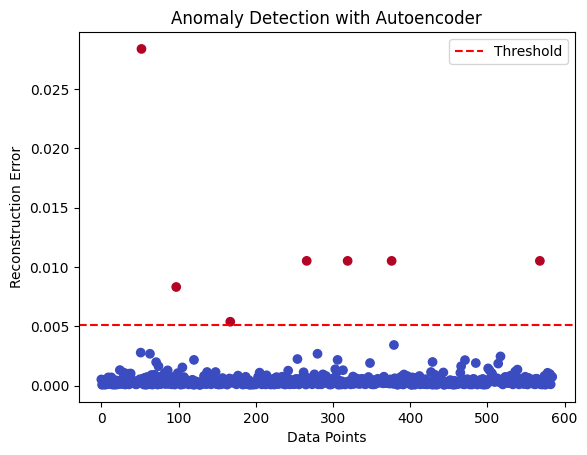

In [22]:
#df2 = df2.set_index("Date")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df2)
X_train, X_test = train_test_split(scaled_data,test_size=0.2)

input_dim = X_train.shape[1]
encoding_dim = 50
autoencoder = Sequential()
autoencoder.add(Dense(encoding_dim, activation='relu', input_shape=(input_dim,)))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile and train the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, validation_data=(X_test, X_test))

# Calculate the reconstruction errors
reconstructions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - reconstructions, 2), axis=1)

# Determine the threshold for anomaly detection
threshold = np.mean(mse) + 3 * np.std(mse)

# Classify data points as normal or anomalous
anomalies = mse > threshold

# Display the anomalies using a scatter plot
plt.scatter(range(len(mse)), mse, c=anomalies, cmap='coolwarm')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.xlabel('Data Points')
plt.ylabel('Reconstruction Error')
plt.title('Anomaly Detection with Autoencoder')
plt.legend()
plt.show()

In [21]:
print("Anomalies found:")
for i, anomaly in enumerate(anomalies):
    if anomaly:
        original_data_point = df2.iloc[i]  # Retrieve the original data point
        print(f"Data point {i} is an anomaly:")
        print(original_data_point)


Anomalies found:
Data point 141 is an anomaly:
Eqp1 Load(%)                                    50.00
Eqp1 Pressure1(bar)                              1.70
Eqp1 Pressure2(bar)                              8.00
Eqp1 Supply Of oil Pressure(bar)                 8.00
Eqp1 oil filter variations Presssure(bar)        0.00
Eqp1 Temp1(degree)                              11.00
Eqp1 Temp1 working                               1.00
Eqp1 Temp2(degree)                              56.00
Eqp1 oil temp sensor Oil level(mm)             240.00
Eqp1 oil temp sensor working                     1.00
Eqp2 water flow(M/hr)                          120.00
Eqp2 Incoming Pressure(bar)                      0.80
Eqp2 OutGoing Pressure(bar)                      0.50
Eqp2 OutGoing Pressure Working                   1.00
Eqp2 Pressure(bar) Diff                          0.16
Eqp2 Pressure Diff Working                       1.00
Eqp2 Incoming Temp(degree)                      25.00
Eqp2 Outgoiing Temp(degree)        

In [37]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import OneClassSVM
failure_data = r'C:\Users\Niranjan\Desktop\BISAG\machine failed\cleaned_data.csv'
dataset = pd.read_csv(failure_data)
df = dataset
df2 = pd.DataFrame(df)
df2["Date"] = df2['Date'].astype(str) + "  " + df['Time'].astype(str)
df2['Date']= pd.to_datetime(df['Date'])
df2 = df2.drop(['Time'],axis = 1)
df2 = df2.set_index("Date")



C:\Users\Niranjan\AppData\Local\Temp\ipykernel_15296\658858217.py:8: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df2['Date']= pd.to_datetime(df['Date'])


In [38]:
# Train the One-Class SVM
svm = OneClassSVM()
svm.fit(df2)

# Predict anomaly scores for the entire dataset
scores = svm.score_samples(df2)

# Determine the threshold for anomaly detection
threshold = scores.mean() - 5* scores.std()  # Example: Threshold using mean - 3 standard deviations

# Classify data points as normal or anomalous
anomalies = scores < threshold

# Print the anomalies found
print("Anomalies found:")
for i, anomaly in enumerate(anomalies):
    if anomaly:
        original_data_point = df2.iloc[i]  # Retrieve the original data point
        print(f"Data point {i} is an anomaly:")
        


Anomalies found:
Data point 1 is an anomaly:
Data point 2 is an anomaly:
Data point 3 is an anomaly:
Data point 4 is an anomaly:
Data point 5 is an anomaly:
Data point 6 is an anomaly:
Data point 7 is an anomaly:
Data point 8 is an anomaly:
Data point 445 is an anomaly:
Data point 446 is an anomaly:
Data point 447 is an anomaly:
Data point 448 is an anomaly:
Data point 449 is an anomaly:
Data point 450 is an anomaly:
Data point 451 is an anomaly:
Data point 452 is an anomaly:
Data point 453 is an anomaly:
Data point 454 is an anomaly:
Data point 455 is an anomaly:
Data point 582 is an anomaly:


Isolation Forest 

In [42]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import OneClassSVM
failure_data = r'C:\Users\Niranjan\Desktop\BISAG\machine failed\cleaned_data.csv'
dataset = pd.read_csv(failure_data)
df = dataset
df2 = pd.DataFrame(df)
df2["Date"] = df2['Date'].astype(str) + "  " + df['Time'].astype(str)
df2['Date']= pd.to_datetime(df['Date'])
df2 = df2.drop(['Time'],axis = 1)
df2 = df2.set_index("Date")

C:\Users\Niranjan\AppData\Local\Temp\ipykernel_15296\2424399798.py:8: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df2['Date']= pd.to_datetime(df['Date'])


In [44]:
from sklearn.ensemble import IsolationForest
# Train the Isolation Forest
isolation_forest = IsolationForest()
isolation_forest.fit(df2)

# Predict anomaly scores for the entire dataset
scores = isolation_forest.decision_function(df2)

# Determine the threshold for anomaly detection
threshold = scores.mean() - 3 * scores.std()  # Example: Threshold using mean - 3 standard deviations

# Classify data points as normal or anomalous
anomalies = scores < threshold

# Print the anomalies found
print("Anomalies found:")
for i, anomaly in enumerate(anomalies):
    if anomaly:
        original_data_point = df2.iloc[i]  # Retrieve the original data point
        print(f"Data point {i} is an anomaly:")

Anomalies found:
Data point 1 is an anomaly:
Data point 2 is an anomaly:
Data point 3 is an anomaly:
Data point 4 is an anomaly:
Data point 5 is an anomaly:
Data point 6 is an anomaly:
Data point 7 is an anomaly:
Data point 8 is an anomaly:
Data point 10 is an anomaly:
Data point 11 is an anomaly:
Data point 243 is an anomaly:
Data point 244 is an anomaly:
Data point 245 is an anomaly:
Data point 257 is an anomaly:
Data point 258 is an anomaly:
Data point 259 is an anomaly:
Data point 260 is an anomaly:
Data point 261 is an anomaly:
Data point 262 is an anomaly:
Data point 263 is an anomaly:
Data point 445 is an anomaly:
Data point 446 is an anomaly:
Data point 447 is an anomaly:
Data point 448 is an anomaly:
Data point 449 is an anomaly:
Data point 450 is an anomaly:
Data point 451 is an anomaly:
Data point 452 is an anomaly:
Data point 453 is an anomaly:
Data point 454 is an anomaly:
Data point 455 is an anomaly:
Data point 582 is an anomaly:


In [45]:
df2.shape

(2924, 22)

In [46]:
df2.head()

,Eqp1 Load(%),Eqp1 Pressure1(bar),Eqp1 Pressure2(bar),Eqp1 Supply Of oil Pressure(bar),Eqp1 oil filter variations Presssure(bar),Eqp1 Temp1(degree),Eqp1 Temp1 working,Eqp1 Temp2(degree),Eqp1 oil temp sensor Oil level(mm),Eqp1 oil temp sensor working,...,Eqp2 OutGoing Pressure(bar),Eqp2 OutGoing Pressure Working,Eqp2 Pressure(bar) Diff,Eqp2 Pressure Diff Working,Eqp2 Incoming Temp(degree),Eqp2 Outgoiing Temp(degree),Eqp3 cold water flow (m/hr),Eqp3 Incoming Pressure(bar),Eqp3 Outgoing Pressure(bar),Failure
Date,,,,,,,,,,,,,,,,,,,,,
2021-09-20,80,2.4,8.5,8.8,0,22,1,65,250,1,...,0.5,1,0.13,1,30,32.0,80,4.5,4.1,0
2021-09-21,80,1.8,9.0,8.5,0,16,1,63,240,1,...,0.0,1,0.15,1,28,30.0,0,4.2,4.5,0
2021-09-21,80,1.8,9.0,8.5,0,16,1,63,240,1,...,0.0,1,0.15,1,28,30.0,0,4.2,4.5,0
2021-09-21,80,1.8,9.0,8.5,0,16,1,63,240,1,...,0.0,1,0.15,1,28,30.0,0,4.2,4.5,0
2021-09-21,60,1.8,8.5,8.1,0,15,1,60,240,1,...,0.0,1,0.30,1,28,30.0,0,4.2,4.5,0


In [48]:
df.shape

(2924, 24)

In [49]:
df.head()

,Date,Time,Eqp1 Load(%),Eqp1 Pressure1(bar),Eqp1 Pressure2(bar),Eqp1 Supply Of oil Pressure(bar),Eqp1 oil filter variations Presssure(bar),Eqp1 Temp1(degree),Eqp1 Temp1 working,Eqp1 Temp2(degree),...,Eqp2 OutGoing Pressure(bar),Eqp2 OutGoing Pressure Working,Eqp2 Pressure(bar) Diff,Eqp2 Pressure Diff Working,Eqp2 Incoming Temp(degree),Eqp2 Outgoiing Temp(degree),Eqp3 cold water flow (m/hr),Eqp3 Incoming Pressure(bar),Eqp3 Outgoing Pressure(bar),Failure
0,20-09-2021,18:45:00,80,2.4,8.5,8.8,0,22,1,65,...,0.5,1,0.13,1,30,32.0,80,4.5,4.1,0
1,21-09-2021,19:45:00,80,1.8,9.0,8.5,0,16,1,63,...,0.0,1,0.15,1,28,30.0,0,4.2,4.5,0
2,21-09-2021,20:45:00,80,1.8,9.0,8.5,0,16,1,63,...,0.0,1,0.15,1,28,30.0,0,4.2,4.5,0
3,21-09-2021,21:45:00,80,1.8,9.0,8.5,0,16,1,63,...,0.0,1,0.15,1,28,30.0,0,4.2,4.5,0
4,21-09-2021,22:45:00,60,1.8,8.5,8.1,0,15,1,60,...,0.0,1,0.30,1,28,30.0,0,4.2,4.5,0


In [50]:
from sklearn.neighbors import LocalOutlierFactor
failure_data = r'C:\Users\Niranjan\Desktop\BISAG\machine failed\cleaned_data.csv'
dataset = pd.read_csv(failure_data)
df = dataset
df2 = pd.DataFrame(df)
df2["Date"] = df2['Date'].astype(str) + "  " + df['Time'].astype(str)
df2['Date']= pd.to_datetime(df['Date'])
df2 = df2.drop(['Time'],axis = 1)
df2 = df2.set_index("Date")
data = df2



C:\Users\Niranjan\AppData\Local\Temp\ipykernel_15296\1181251448.py:7: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df2['Date']= pd.to_datetime(df['Date'])


In [57]:
# Train the Local Outlier Factor
lof = LocalOutlierFactor(novelty=True)
lof.fit(data)

# Predict anomaly scores for the entire dataset
scores = -lof.decision_function(data)

# Determine the threshold for anomaly detection
threshold = scores.mean() + 0.0005 * scores.std()  # Example: Threshold using mean + 3 standard deviations

# Classify data points as normal or anomalous
anomalies = scores > threshold

# Print the anomalies found
print("Anomalies found:")
for i, anomaly in enumerate(anomalies):
    if anomaly:
        original_data_point = data.iloc[i]  # Retrieve the original data point
        print(f"Data point {i} is an anomaly:")

Anomalies found:
Data point 246 is an anomaly:
Data point 247 is an anomaly:
Data point 248 is an anomaly:
Data point 249 is an anomaly:
Data point 250 is an anomaly:
Data point 251 is an anomaly:
Data point 252 is an anomaly:
Data point 253 is an anomaly:
Data point 254 is an anomaly:
Data point 255 is an anomaly:
Data point 256 is an anomaly:
Data point 257 is an anomaly:
Data point 258 is an anomaly:
Data point 259 is an anomaly:
Data point 260 is an anomaly:
Data point 261 is an anomaly:
Data point 262 is an anomaly:
Data point 263 is an anomaly:
Data point 289 is an anomaly:
Data point 290 is an anomaly:
Data point 873 is an anomaly:
Data point 874 is an anomaly:
Data point 875 is an anomaly:
Data point 876 is an anomaly:
Data point 919 is an anomaly:
Data point 920 is an anomaly:
Data point 921 is an anomaly:
Data point 922 is an anomaly:
Data point 923 is an anomaly:
Data point 924 is an anomaly:
Data point 925 is an anomaly:
Data point 938 is an anomaly:
Data point 955 is an an

C:\Users\Niranjan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


Mahalanobis Distance

In [31]:
import pandas as pd 
import numpy as np 
import math as mt
from sklearn.model_selection import train_test_split

from sklearn.neighbors import LocalOutlierFactor
failure_data = r'C:\Users\Niranjan\Desktop\BISAG\machine failed\cleaned_data.csv'
dataset = pd.read_csv(failure_data)
df = dataset
df2 = pd.DataFrame(df)
df2["Date"] = df2['Date'].astype(str) + "  " + df2['Time'].astype(str)
df2['Date']= pd.to_datetime(df2['Date'], format='%d-%m-%Y %H:%M:%S')
df2 = df2.drop(['Time'],axis = 1)
df3=df2
df2 = df2.set_index("Date")
data = df2


In [33]:
from scipy.spatial.distance import mahalanobis
# Calculate the Mahalanobis distance
cov_matrix = np.cov(data.T)  # Calculate the covariance matrix

# Regularization to handle singular matrix
reg_cov_matrix = cov_matrix + 1e-8 * np.eye(cov_matrix.shape[0])

# Calculate the inverse of the covariance matrix
inv_cov_matrix = np.linalg.inv(reg_cov_matrix)

# Calculate the Mahalanobis distance for each data point
mahalanobis_dist = []
mean_vector = data.mean().values  # Calculate the mean vector
for i in range(len(data)):
    data_point = data.iloc[i].values
    dist = mahalanobis(data_point, mean_vector, inv_cov_matrix)
    mahalanobis_dist.append(dist)

# Determine the threshold for anomaly detection
threshold = np.mean(mahalanobis_dist) +  5*np.std(mahalanobis_dist)  # Example: Threshold using mean + 3 standard deviations

# Classify data points as normal or anomalous
anomalies = np.array(mahalanobis_dist) > threshold
z = 0

print("Anomalies found:")
for i, anomaly in enumerate(anomalies):
    if anomaly:
        original_data_point = data.iloc[i]  # Retrieve the original data point
        index_value = data.index[i]  # Retrieve the index value
        print(f"{index_value}")
        #print(f"Data point {index_value} is an anomaly:")
        #z += 1
        #print(z)


Anomalies found:
2021-10-13 19:00:00
2021-10-13 20:00:00
2021-10-13 21:00:00
2021-10-13 22:00:00
2021-10-19 07:00:00
2022-06-19 02:00:00
2022-06-19 03:00:00
2022-06-22 00:00:00
2022-06-25 08:00:00
2022-06-25 09:00:00
2022-06-25 10:00:00
2022-06-25 11:00:00
2022-06-25 12:00:00
2022-06-25 13:00:00
